# Here showing step by step SolarPanel detection procedure

In [1]:
import os
import math
import sys
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
#simple testing image load 
img=image.load_img("testing/Laarbeek_1.jpg")

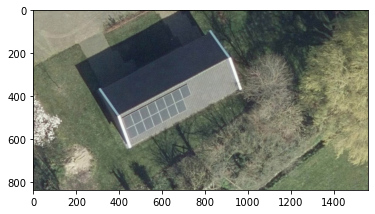

In [3]:
plt.imshow(img)

In [4]:
#Now generate the data according to train and validation datasets
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [5]:
#Now creating the training and validating datasets according to need.
train_dataset=train.flow_from_directory("training",
                                        target_size=(200,200),
                                        batch_size=3,
                                        class_mode='binary')
validation_dataset=validation.flow_from_directory("validation",
                                        target_size=(200,200),
                                        batch_size=3,
                                        class_mode='binary')

Found 1402 images belonging to 2 classes.
Found 98 images belonging to 2 classes.


In [6]:
train_dataset.class_indices

{'non-solar': 0, 'solar': 1}

In [7]:
train_dataset.classes

array([0, 0, 0, ..., 1, 1, 1])

In [8]:
#Also check the labels of the traing datasets
label=train_dataset.labels

In [9]:
ldf=pd.DataFrame(label)

In [10]:
ldf

,0
0,0
1,0
2,0
3,0
4,0
...,...
1397,1
1398,1
1399,1
1400,1


Converting the training datasets into labels

In [11]:
header = ["id", "label"]
ldf.to_csv('traing_label.csv',header=True,index=True,index_label="id")

Now converting the validation dataset labels into csv

In [12]:
vlabel=validation_dataset.labels

In [13]:
vpd=pd.DataFrame(vlabel)

In [14]:
#convetign into csv format
vpd.to_csv('vlabel.csv',header=True,index=True,index_label="id")

In [15]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3) ),
                                   tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),

                                #
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),

                                  ##
                                  tf.keras.layers.Flatten(),
                                  ##
                                  tf.keras.layers.Dense(512,activation='relu'),

                                  #
                                  tf.keras.layers.Dense(1,activation='sigmoid'),
                                  ])

In [16]:
model

In [17]:
model.compile(loss="binary_crossentropy",
              optimizer=RMSprop(lr=.001),
              metrics=['accuracy'])

C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [22]:
model_fit=model.fit(train_dataset,steps_per_epoch=3,
                    epochs=20,batch_size=100,verbose=1,
                    validation_data=validation_dataset)


Epoch 1/20
3/3 [==============================] - 1s 519ms/step - loss: 0.5032 - accuracy: 0.8889 - val_loss: 0.8609 - val_accuracy: 0.5000
Epoch 2/20
3/3 [==============================] - 1s 480ms/step - loss: 0.9587 - accuracy: 0.5556 - val_loss: 0.7149 - val_accuracy: 0.5000
Epoch 3/20
3/3 [==============================] - 1s 533ms/step - loss: 0.7872 - accuracy: 0.3333 - val_loss: 0.6939 - val_accuracy: 0.5000
Epoch 4/20
3/3 [==============================] - 1s 501ms/step - loss: 0.6875 - accuracy: 0.5556 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 5/20
3/3 [==============================] - 1s 488ms/step - loss: 0.6931 - accuracy: 0.5556 - val_loss: 0.6950 - val_accuracy: 0.5000
Epoch 6/20
3/3 [==============================] - 1s 495ms/step - loss: 0.6291 - accuracy: 0.7778 - val_loss: 0.7123 - val_accuracy: 0.5000
Epoch 7/20
3/3 [==============================] - 1s 514ms/step - loss: 0.5880 - accuracy: 0.7778 - val_loss: 0.7984 - val_accuracy: 0.5000
Epoch 8/20
3/3 [====

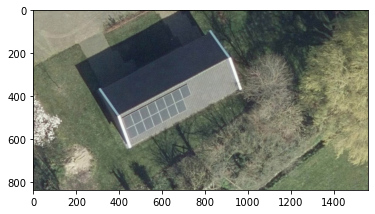

Here include solar


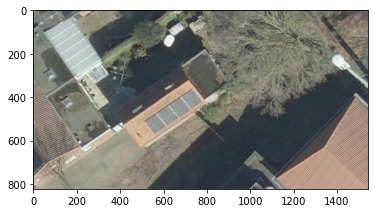

Here include solar


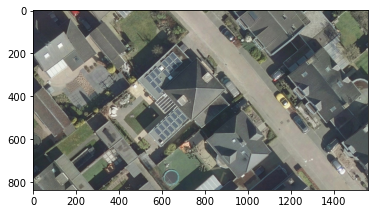

Here include solar


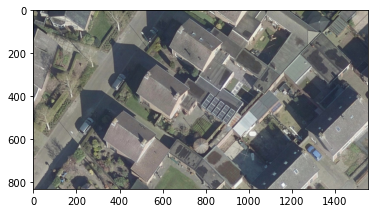

Here include solar


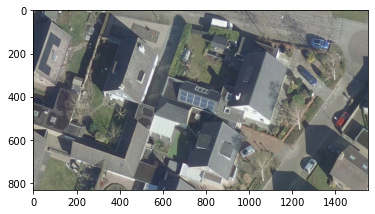

Here include solar


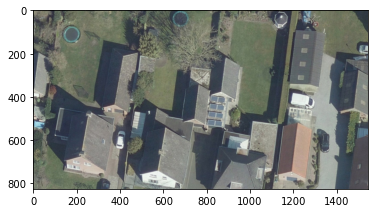

Here include solar


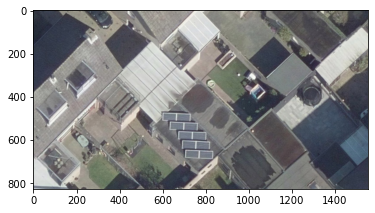

Here include solar


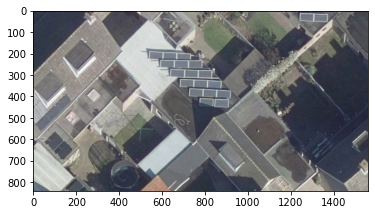

Here include solar


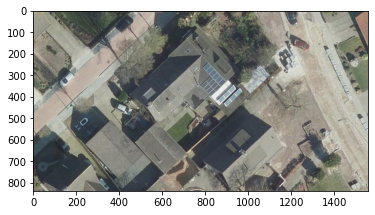

Here include solar


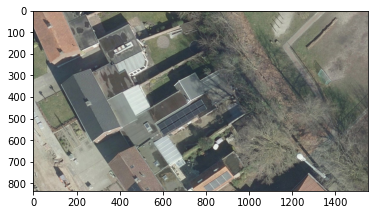

Here include solar


In [24]:
dir_path="testing"
for i in os.listdir(dir_path):
  imags=image.load_img(dir_path+"//"+i)
  plt.imshow(imags)
  plt.show()
  img=cv2.imread(dir_path+"//"+i)
  img=cv2.resize(img,(200,200))
  imgar=image.img_to_array(img)
  X=np.expand_dims(imgar,axis=0)
  imagpr=np.vstack([X])
  val=model.predict(imagpr)
  val=math.ceil(val)
  if val==0:
    print("Here not include solar")
  else:
    print("Here include solar")


In [25]:
dir_path="testing"
result_dir="result"
for i in os.listdir(dir_path):
    img = cv2.imread(dir_path+"//"+i)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    ret,thresh1 = cv2.threshold(hsv[:,:,0],100,255,cv2.THRESH_BINARY)
    contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    try: hierarchy = hierarchy[0]
    except: hierarchy = []
    for contour, hier in zip(contours, hierarchy):
        area = cv2.contourArea(contour)
        if area > 10000 and area < 250000:
            rect = cv2.minAreaRect(contour)
            box = cv2.boxPoints(rect)
            box = np.int0(box)
            cv2.drawContours(img,[box],0,(0,0,255),2)
            cv2.imshow('cont imge', img)
            cv2.waitKey(0)
    cv2.imwrite(result_dir+"//"+i,img)